In [1]:
from glob import glob
import os

folder_path = r"C:\Users\DeeHa\OneDrive\Pictures\New folder"

# Search for all .jpg files inside subfolders
image_files = glob(os.path.join(folder_path, "**", "*.jpg"), recursive=True)

print(f"Total images found: {len(image_files)}")

Total images found: 10237


Total images found: 10237
Sample image paths: ['C:\\Users\\DeeHa\\OneDrive\\Pictures\\New folder\\jpeg\\1.3.6.1.4.1.9590.100.1.2.100018879311824535125115145152454291132\\1-263.jpg', 'C:\\Users\\DeeHa\\OneDrive\\Pictures\\New folder\\jpeg\\1.3.6.1.4.1.9590.100.1.2.100018879311824535125115145152454291132\\2-241.jpg', 'C:\\Users\\DeeHa\\OneDrive\\Pictures\\New folder\\jpeg\\1.3.6.1.4.1.9590.100.1.2.100131208110604806117271735422083351547\\1-126.jpg', 'C:\\Users\\DeeHa\\OneDrive\\Pictures\\New folder\\jpeg\\1.3.6.1.4.1.9590.100.1.2.100522099512256189513864912954167862869\\1-231.jpg', 'C:\\Users\\DeeHa\\OneDrive\\Pictures\\New folder\\jpeg\\1.3.6.1.4.1.9590.100.1.2.100522676511025180541602449080267145647\\1-111.jpg']


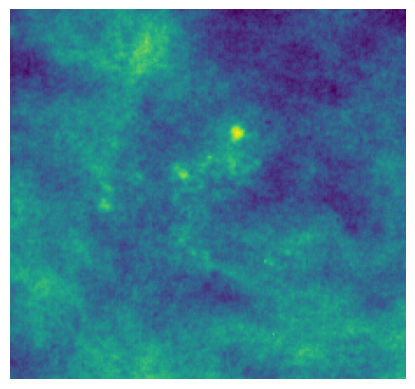

In [2]:
#Load a Sample Set of Images
from glob import glob
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define folder path
folder_path = r"C:\Users\DeeHa\OneDrive\Pictures\New folder"

# Get all .jpg images (update extension if needed)
image_paths = glob(os.path.join(folder_path, "**", "*.jpg"), recursive=True)

# Ensure images are found before proceeding
if image_paths:
    print(f"Total images found: {len(image_paths)}")
    print("Sample image paths:", image_paths[:5])  # Show a few file names

    # Load and display the first image
    img = Image.open(image_paths[0])
    plt.imshow(img)
    plt.axis('off')
    plt.show()
else:
    print("No images found. Check your folder path and file extensions.")

Image size: (226, 211), Mode: L


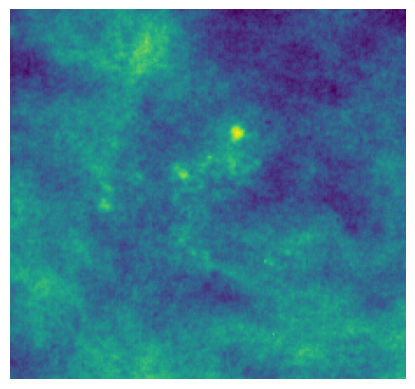

Image size: (2626, 5056), Mode: L


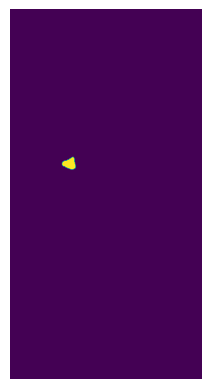

Image size: (3826, 6601), Mode: L


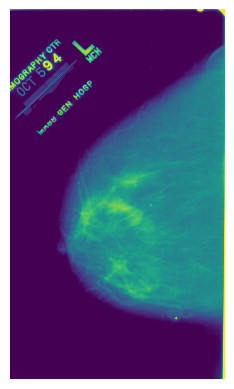

Image size: (4126, 5491), Mode: L


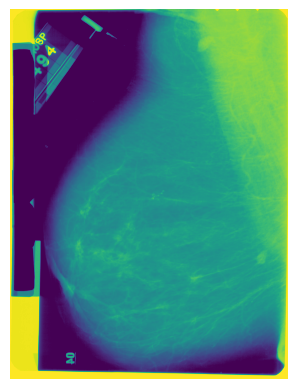

Image size: (3151, 5491), Mode: L


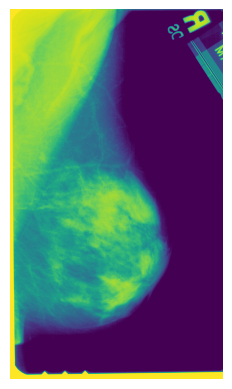

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

for img_path in image_files[:5]:  # Load first five images
    img = Image.open(img_path)
    print(f"Image size: {img.size}, Mode: {img.mode}")

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [4]:
# Check Image Properties
# Analyze resolution, aspect ratio, and color channels.

from PIL import Image

# Loop through all images
for img_path in image_files:
    img = Image.open(img_path)
    width, height = img.size
    print(f"Image size: {width}x{height}, Mode: {img.mode}")


Image size: 226x211, Mode: L
Image size: 2626x5056, Mode: L
Image size: 3826x6601, Mode: L
Image size: 4126x5491, Mode: L
Image size: 3151x5491, Mode: L
Image size: 89x81, Mode: L
Image size: 4072x5728, Mode: L
Image size: 2952x4504, Mode: L
Image size: 3480x5992, Mode: L
Image size: 2568x4648, Mode: L
Image size: 3166x6256, Mode: L
Image size: 2896x4504, Mode: L
Image size: 2731x5236, Mode: L
Image size: 2807x4595, Mode: L
Image size: 497x537, Mode: L
Image size: 2041x4651, Mode: L
Image size: 3072x4544, Mode: L
Image size: 3992x5768, Mode: L
Image size: 305x401, Mode: L
Image size: 2281x5296, Mode: L
Image size: 341x365, Mode: L
Image size: 2491x5206, Mode: L
Image size: 334x364, Mode: L
Image size: 3416x6032, Mode: L
Image size: 2911x5491, Mode: L
Image size: 191x266, Mode: L
Image size: 1936x4996, Mode: L
Image size: 2506x4741, Mode: L
Image size: 436x386, Mode: L
Image size: 2664x4720, Mode: L
Image size: 249x233, Mode: L
Image size: 3280x5896, Mode: L
Image size: 370x327, Mode: L

In [5]:
# Code to Find Max & Min Image Size
from PIL import Image

# Initialize variables for tracking min/max
max_size = (0, 0)  # (width, height)
min_size = (float('inf'), float('inf'))  # (width, height)

for img_path in image_files:
    img = Image.open(img_path)
    width, height = img.size

    # Update max/min size
    if (width, height) > max_size:
        max_size = (width, height)
    if (width, height) < min_size:
        min_size = (width, height)

# Print results
print(f"Largest image size: {max_size[0]}x{max_size[1]}")
print(f"Smallest image size: {min_size[0]}x{min_size[1]}")

Largest image size: 5431x6871
Smallest image size: 68x129


In [6]:
import os
import glob

# Track empty files
empty_files = []

# Function to check empty files
def find_empty_images(img_path):
    if os.path.getsize(img_path) == 0:
        print(f"⚠ Empty File: {img_path}")  # Prints empty files
        empty_files.append(img_path)  # Store empty file paths

# Process all images
for img in image_files:
    find_empty_images(img)

# Print message if no empty files are found
if not empty_files:
    print("✅ No empty files found!")

✅ No empty files found!


In [7]:
import os
import glob
import numpy as np
from PIL import Image
from concurrent.futures import ThreadPoolExecutor

# Track corrupted files
corrupted_files = []

# Function to detect corrupted images
def find_corrupted_images(image_path):
    try:
        with Image.open(image_path) as img:
            img.load()  # Loads image to check for corruption. This is slow but more reliable that .verify()
    
    except Exception as e:
        print(f"❌ Corrupt File: {image_files} → {e}")
        corrupted_files.append(image_files)

# Process all images through multi-threading to make the process more efficient
with ThreadPoolExecutor(max_workers=8) as executor:  # Adjust worker count based on CPU capability
    executor.map(find_corrupted_images, image_files)

# Print message if no corrupted files are found
if not corrupted_files:
    print("✅ No corrupted images found!")

✅ No corrupted images found!


In [8]:
from PIL import Image
import glob

# Resolution threshold
MIN_WIDTH, MIN_HEIGHT = 100, 100

# Function to check resolution
def find_low_res_images(image_files):
    try:
        with Image.open(image_files) as img:
            width, height = img.size
            #print(f"🔍 Checking: {img} → {width}x{height}")  # Always prints resolution
            if width < MIN_WIDTH or height < MIN_HEIGHT:
                print(f"⚠ Low Resolution Detected: {img} → {width}x{height}")  # Only prints low-resolution ones
    except Exception as e:
        print(f"❌ Error processing {img}: {e}")

# Process images correctly
for img in image_files:
    find_low_res_images(img)

⚠ Low Resolution Detected: <PIL.JpegImagePlugin.JpegImageFile image mode=L size=89x81 at 0x1CD809DF740> → 89x81
⚠ Low Resolution Detected: <PIL.JpegImagePlugin.JpegImageFile image mode=L size=89x89 at 0x1CD809DEB10> → 89x89
⚠ Low Resolution Detected: <PIL.JpegImagePlugin.JpegImageFile image mode=L size=105x89 at 0x1CD809DEF30> → 105x89
⚠ Low Resolution Detected: <PIL.JpegImagePlugin.JpegImageFile image mode=L size=81x89 at 0x1CD809DC920> → 81x89
⚠ Low Resolution Detected: <PIL.JpegImagePlugin.JpegImageFile image mode=L size=105x89 at 0x1CD809DFA40> → 105x89
⚠ Low Resolution Detected: <PIL.JpegImagePlugin.JpegImageFile image mode=L size=81x89 at 0x1CD809DEA80> → 81x89
⚠ Low Resolution Detected: <PIL.JpegImagePlugin.JpegImageFile image mode=L size=68x129 at 0x1CD809DC920> → 68x129
⚠ Low Resolution Detected: <PIL.JpegImagePlugin.JpegImageFile image mode=L size=81x89 at 0x1CD809DF140> → 81x89
⚠ Low Resolution Detected: <PIL.JpegImagePlugin.JpegImageFile image mode=L size=97x81 at 0x1CD809D

In [9]:
#EDA analysis and findings for image dataset
#Total images - 10237

#Image type -JPG format

#Dataset contains images with a largest resolution of 5431x6871 pixels and a smallest resolution of 68x129 pixels
#This indicates a wide range in image sizes, which could affect preprocessing steps like resizing, normalization, or feature extraction

#Checked images for empty Files, formatting issues, metadata and mode, file corruption, color mode, low resolution and missing metadata
#Found 77 images that are low resolution. Everything else looks good. 